In [1]:
#Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime


#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE

#NetworkX
import networkx as nx

#To avoid printing of Deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#Time series Analysis:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Coverting the date column to datetime and sorting
#data['Date'] =  pd.to_datetime(data['Date'],infer_datetime_format=True,format='%y-%m-%d')
#data.sort_values(by='Date',inplace=True)

#Reading data
#Hourly data
bt_data=pd.read_csv('11_01_20_bit_hist_hr.csv')
eth_data=pd.read_csv('11_01_20_eth_hist_hr.csv')
shib_data=pd.read_csv('11_01_20_doge_hist_hr.csv')
dg_data=pd.read_csv('11_01_20_shib_hist_hr.csv')

#Daily data
bt_dt_data=pd.read_csv('bit_hist_dates.csv')
eth_dt_data=pd.read_csv('eth_hist_dates.csv')
shib_dt_data=pd.read_csv('shib_hist_updt_pr.csv')
dg_dt_data=pd.read_csv('doge_hist_dates.csv')


In [3]:
#Data visualization
def triplot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

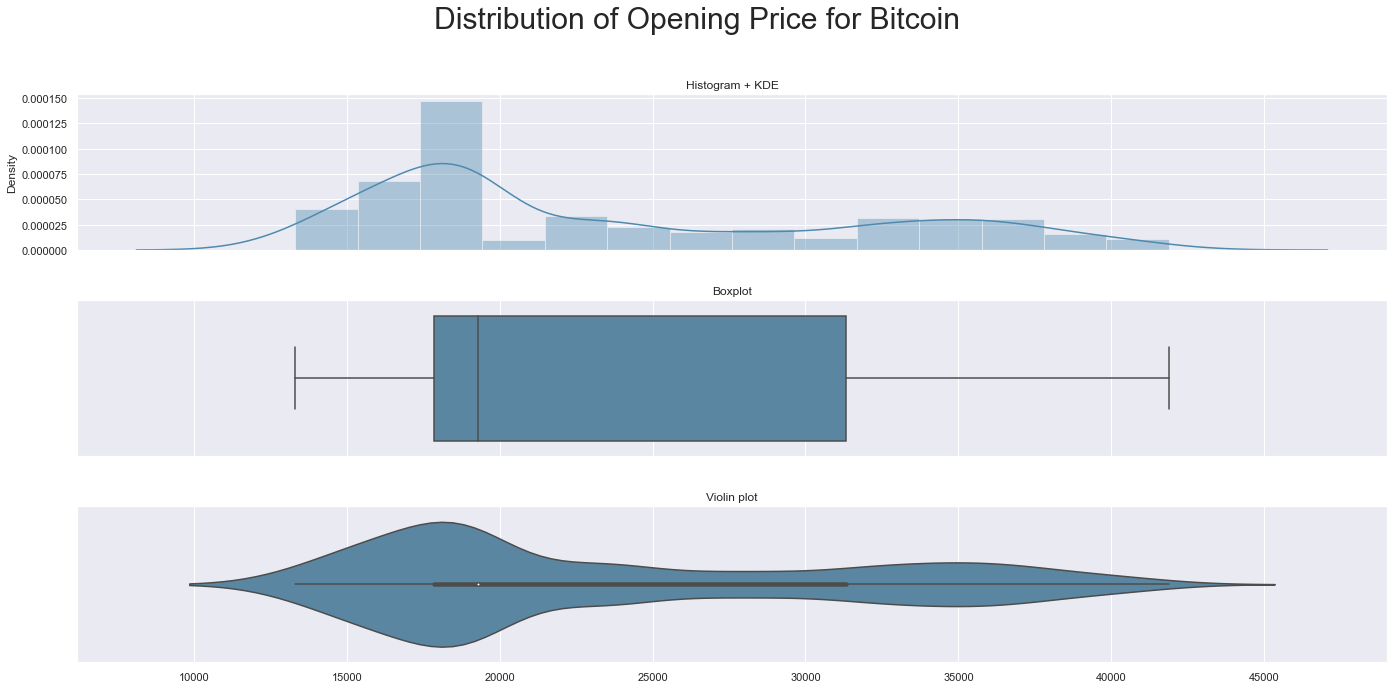

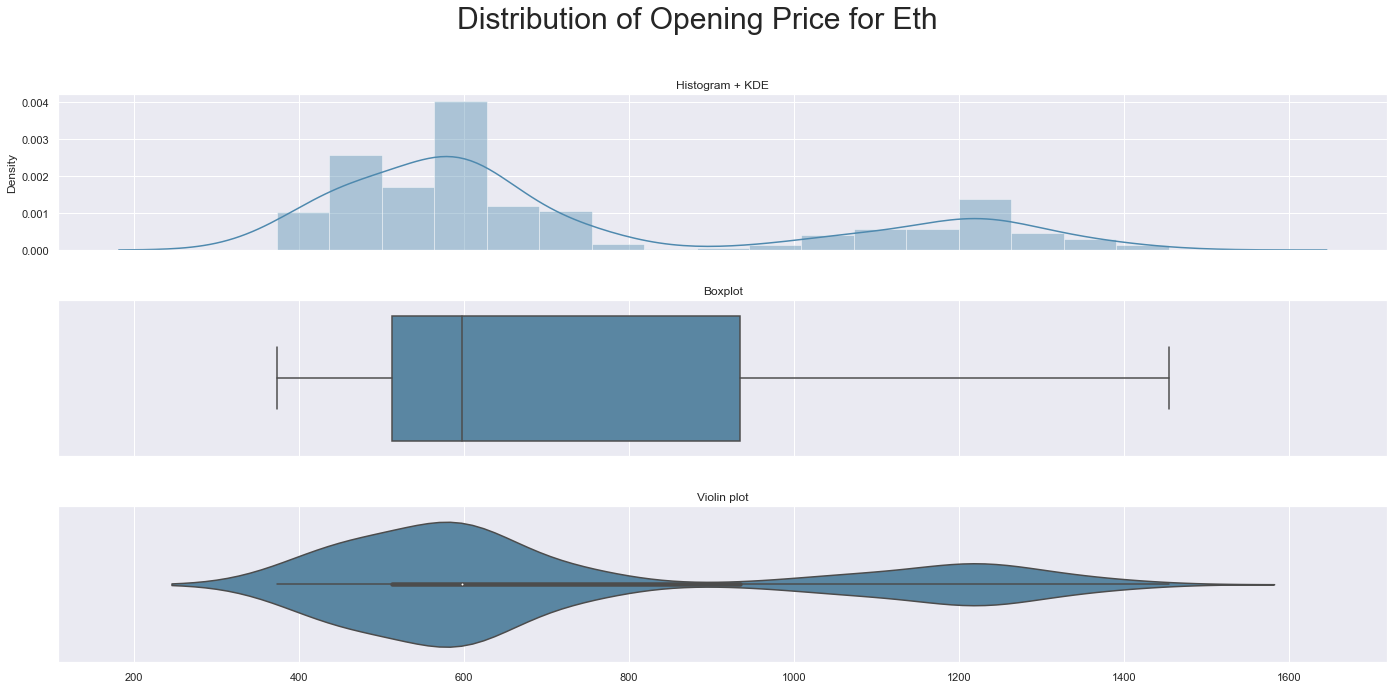

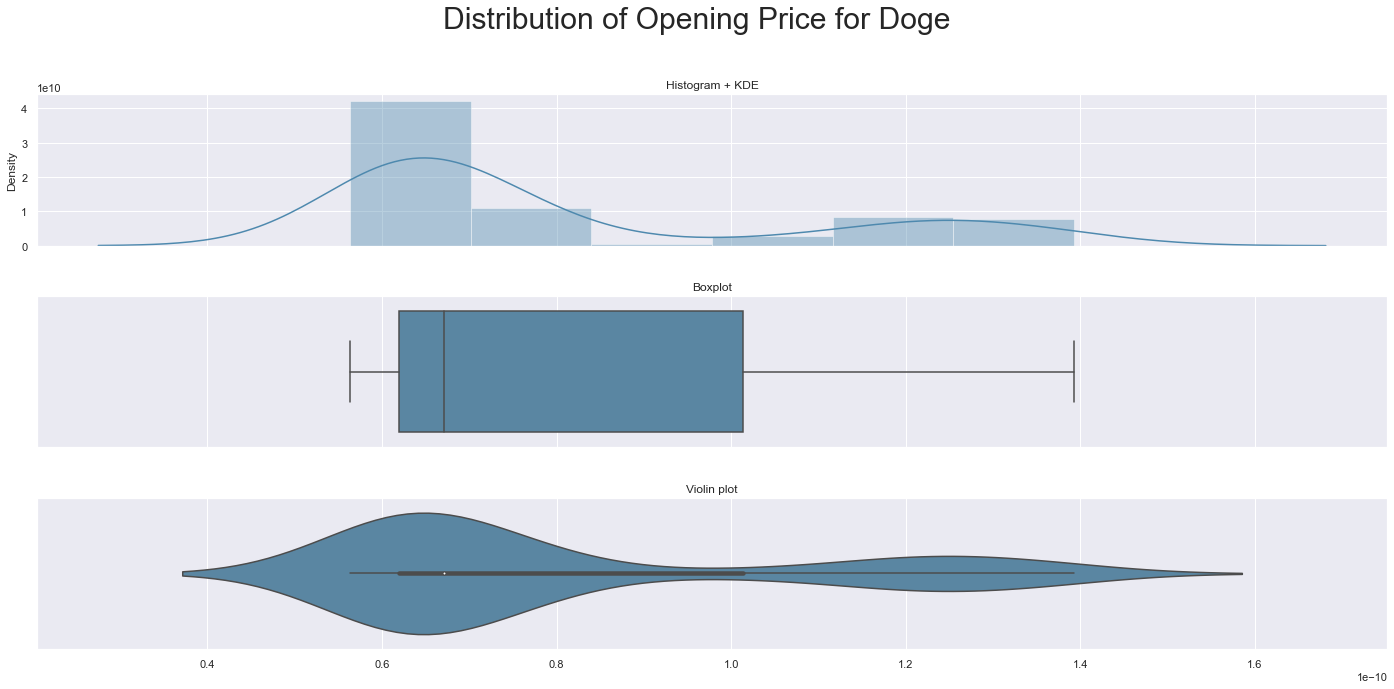

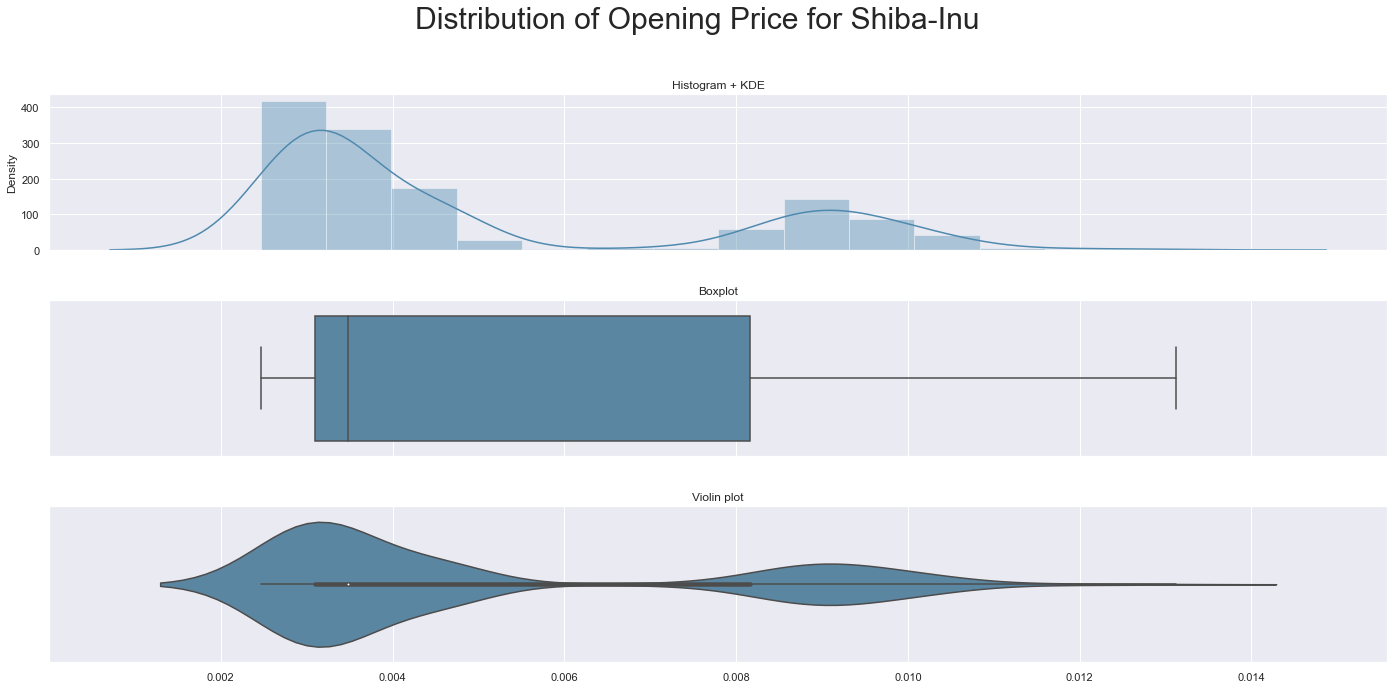

In [4]:
#Visualizing price movement value for the selected crypto currencies
#to understand price movement and possible trend
#the covered time frame is from 11-01-20 to 01-30-21 
#at an hourly rate

#Bitcoin
triplot(bt_data['prices'],'Distribution of Opening Price for Bitcoin',custom_colors[0])
#Etherum
triplot(eth_data['prices'],'Distribution of Opening Price for Eth',custom_colors[0])
#doge
triplot(dg_data['prices'],'Distribution of Opening Price for Doge',custom_colors[0])
#shiba-inu
triplot(shib_data['prices'],'Distribution of Opening Price for Shiba-Inu',custom_colors[0])


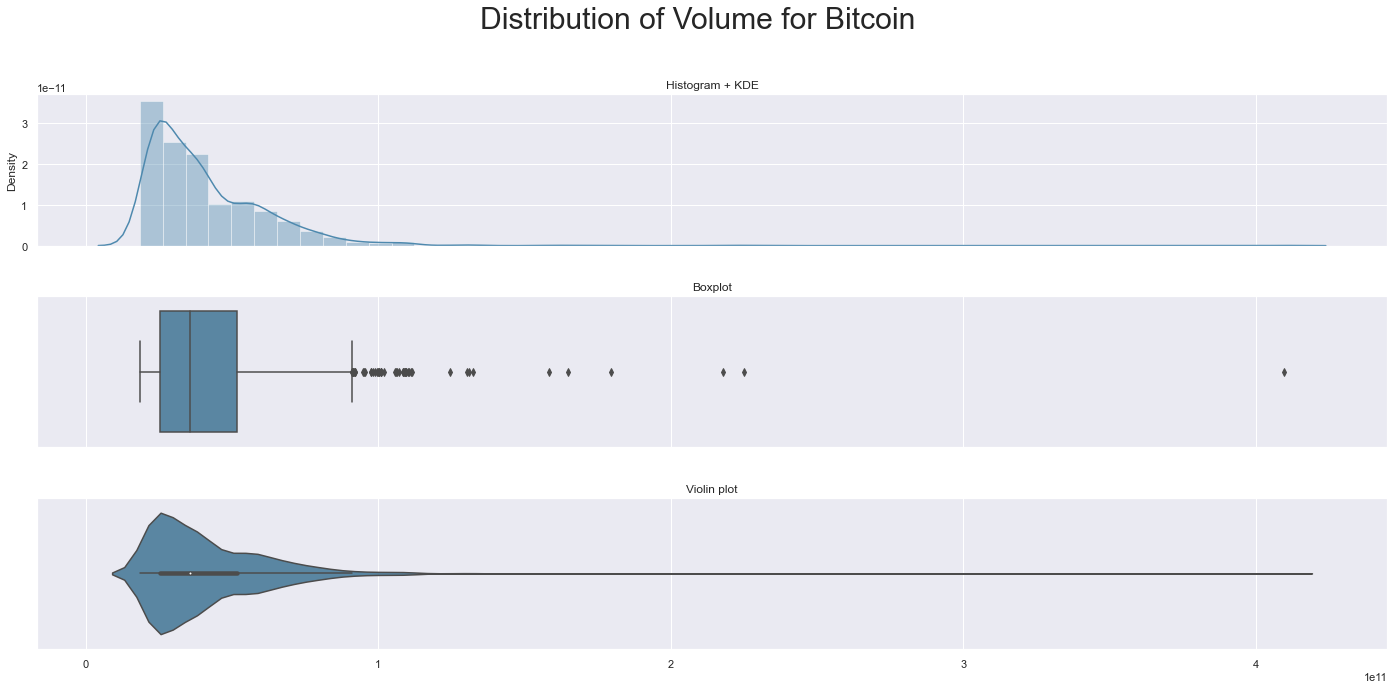

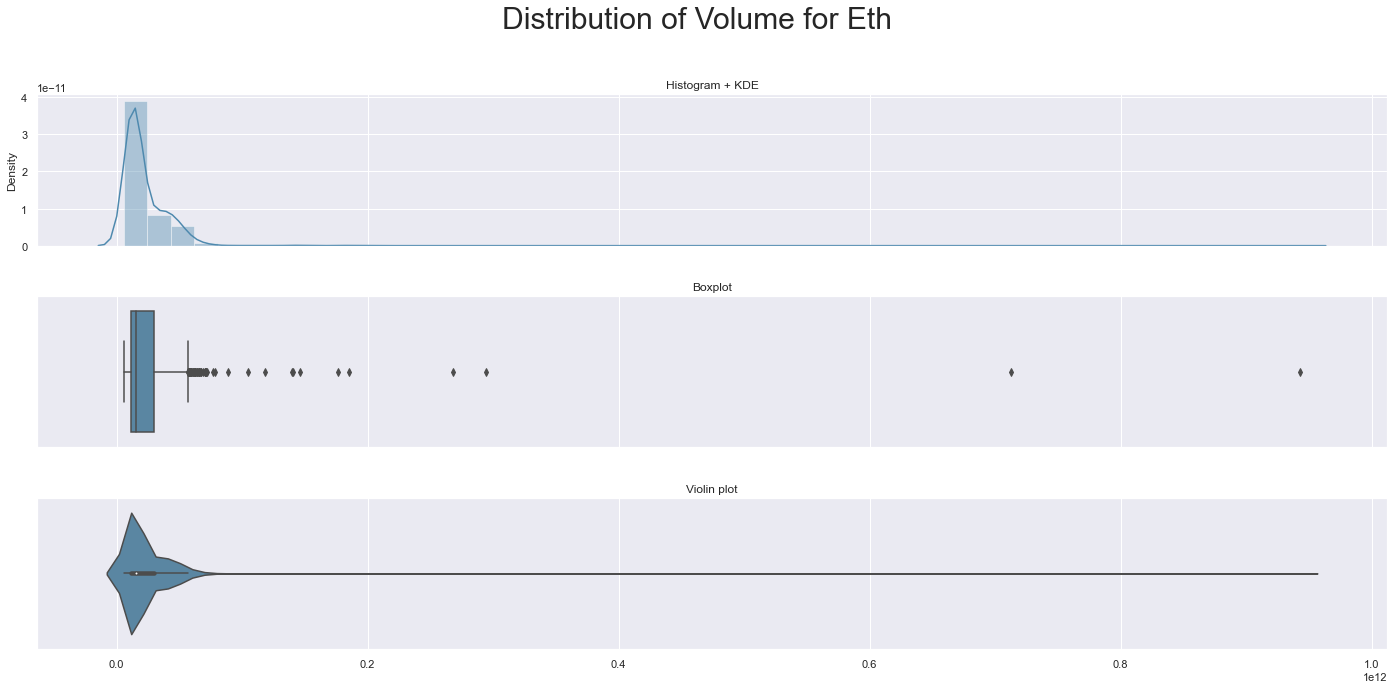

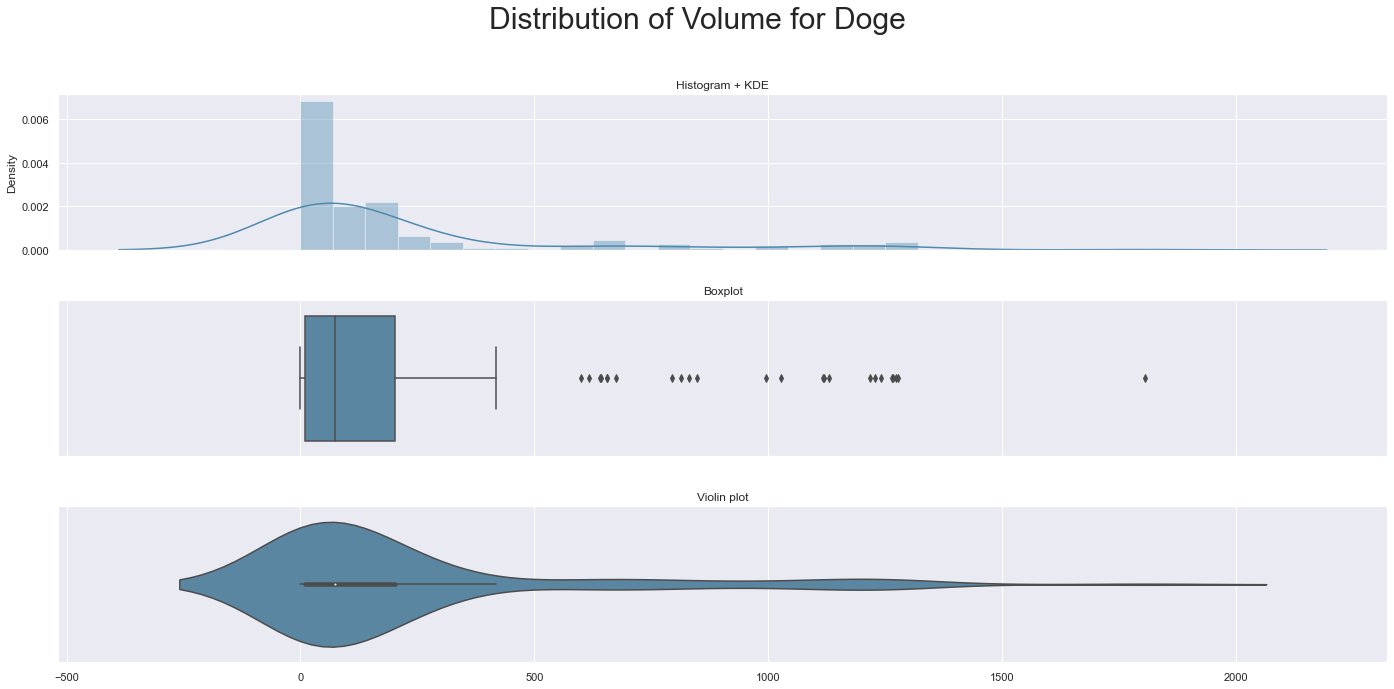

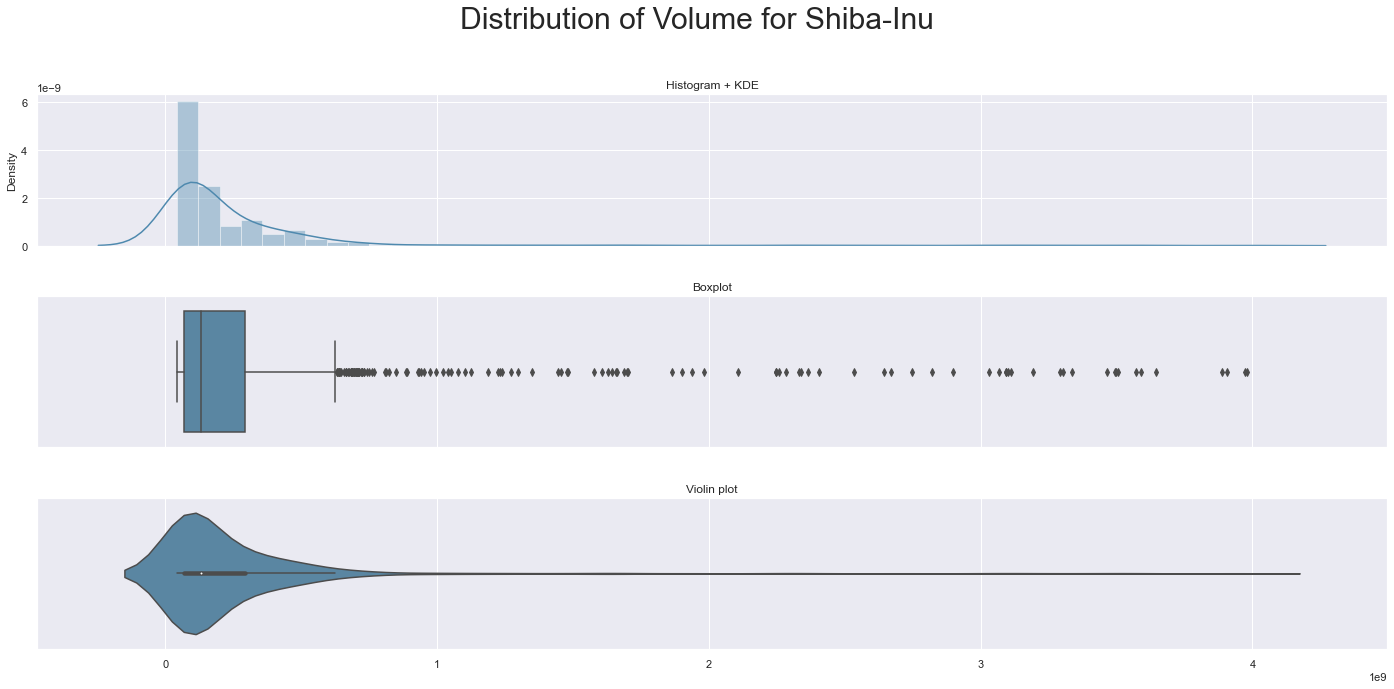

In [5]:
#Visualizing coin volumes

#Bitcoin
triplot(bt_data['total_volumes'],'Distribution of Volume for Bitcoin',custom_colors[0])
#Etherum
triplot(eth_data['total_volumes'],'Distribution of Volume for Eth',custom_colors[0])
#doge
triplot(dg_data['total_volumes'],'Distribution of Volume for Doge',custom_colors[0])
#shiba-inu
triplot(shib_data['total_volumes'],'Distribution of Volume for Shiba-Inu',custom_colors[0])


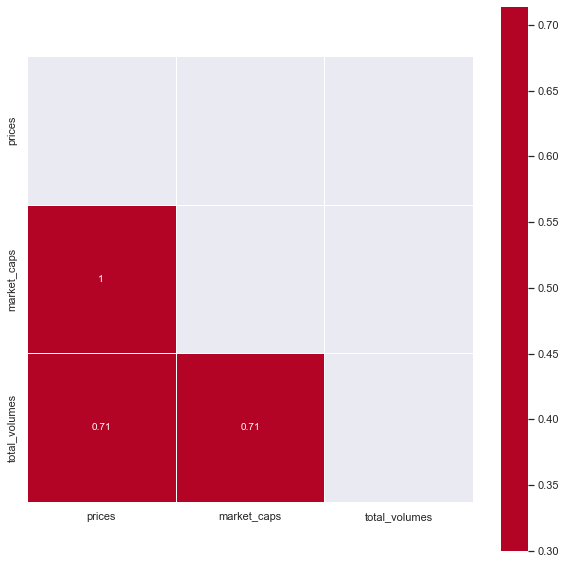

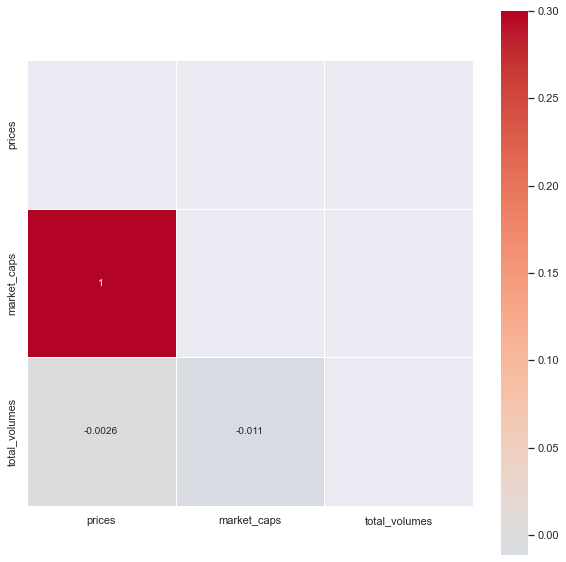

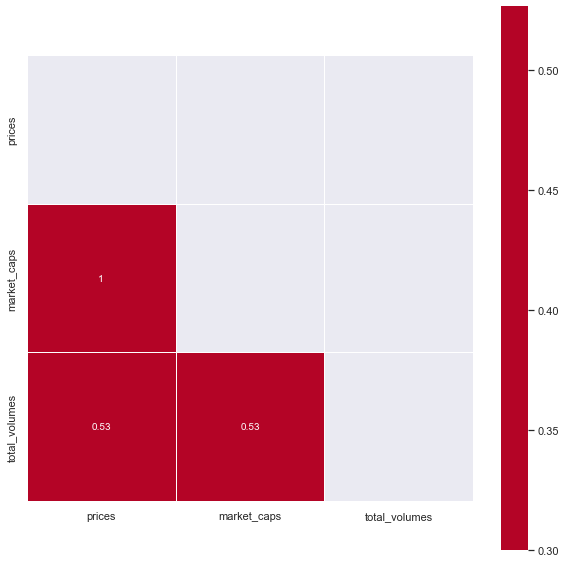

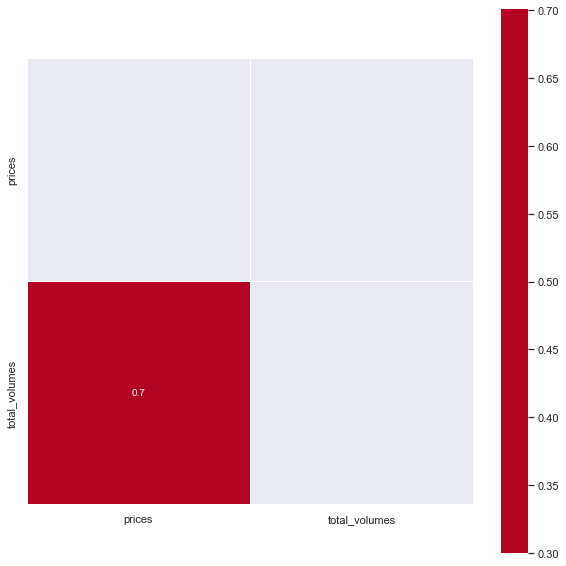

In [6]:
#Correlation analysis
#Bitcoin
plt.figure(figsize=(10,10))
corr=bt_data[bt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(bt_data[bt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()
#ETH
plt.figure(figsize=(10,10))
corr=eth_dt_data[eth_dt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(eth_dt_data[eth_dt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()
#doge
plt.figure(figsize=(10,10))
corr=dg_dt_data[dg_dt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(dg_dt_data[dg_dt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()
#Shib
plt.figure(figsize=(10,10))
corr=shib_dt_data[shib_dt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(shib_dt_data[shib_dt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

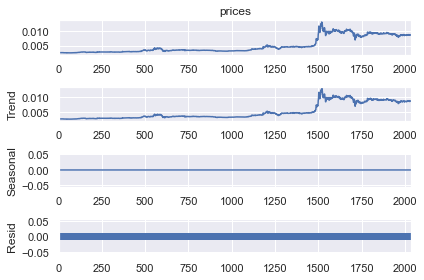

<Figure size 1080x864 with 0 Axes>

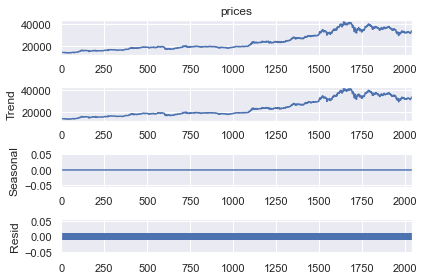

<Figure size 1080x864 with 0 Axes>

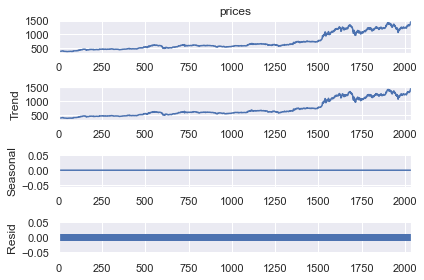

<Figure size 1080x864 with 0 Axes>

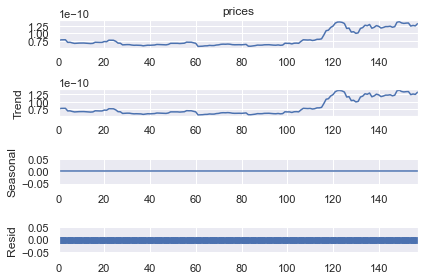

<Figure size 1080x864 with 0 Axes>

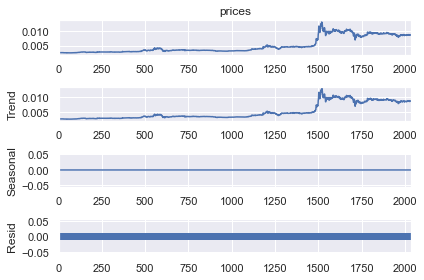

In [7]:
#Time series analysis for Bitcoin
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = bt_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

#Time series analysis for Eth
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = eth_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

#Time series analysis for Doge
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = dg_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

#Time series analysis for Shiba-Inu
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = shib_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [8]:
#Using the augmented dicky fuller test to determine 
#how strongly the time series is defined by a trend
def test_trend(x, log="non stationary"):
   #Dickey Fuller test    
    result = adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-val: %f'%result[1])
    pvalue=result[1]
    
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph has a trend")
            break
        else:
            print("The graph doesn't have a trend")
            break;
    
    print('Important values:')
    for key,value in result[4].items():
        print('\t%s: %.2f ' % (key, value))
    
    #Rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plotting statistics:
    plt.figure(figsize=(25, 11))
    orig = plt.plot(x, color='black', lw=8, label='Original')
    mean = plt.plot(rolmean, color='green', lw=2.5, ls="--",  label='Rolling Mean')
    std = plt.plot(rolstd, color='red', lw=3, label = 'Rolling Std')
    plt.legend(loc='best', fontsize=24)
    plt.title('Rolling Mean and Standard Dev', size=25)
    plt.show(block=False)

ADF Stastistic: -0.852087
p-val: 0.803341
The graph has a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


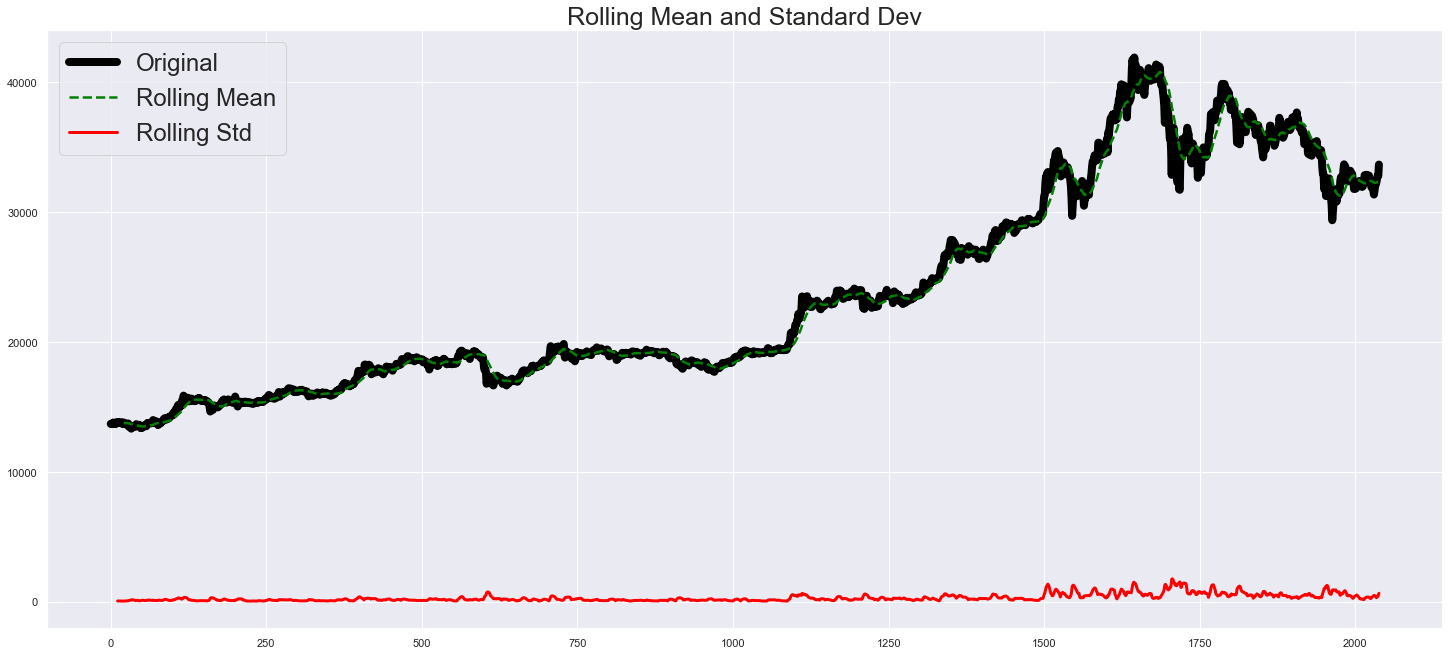

ADF Stastistic: 0.532933
p-val: 0.985840
The graph has a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


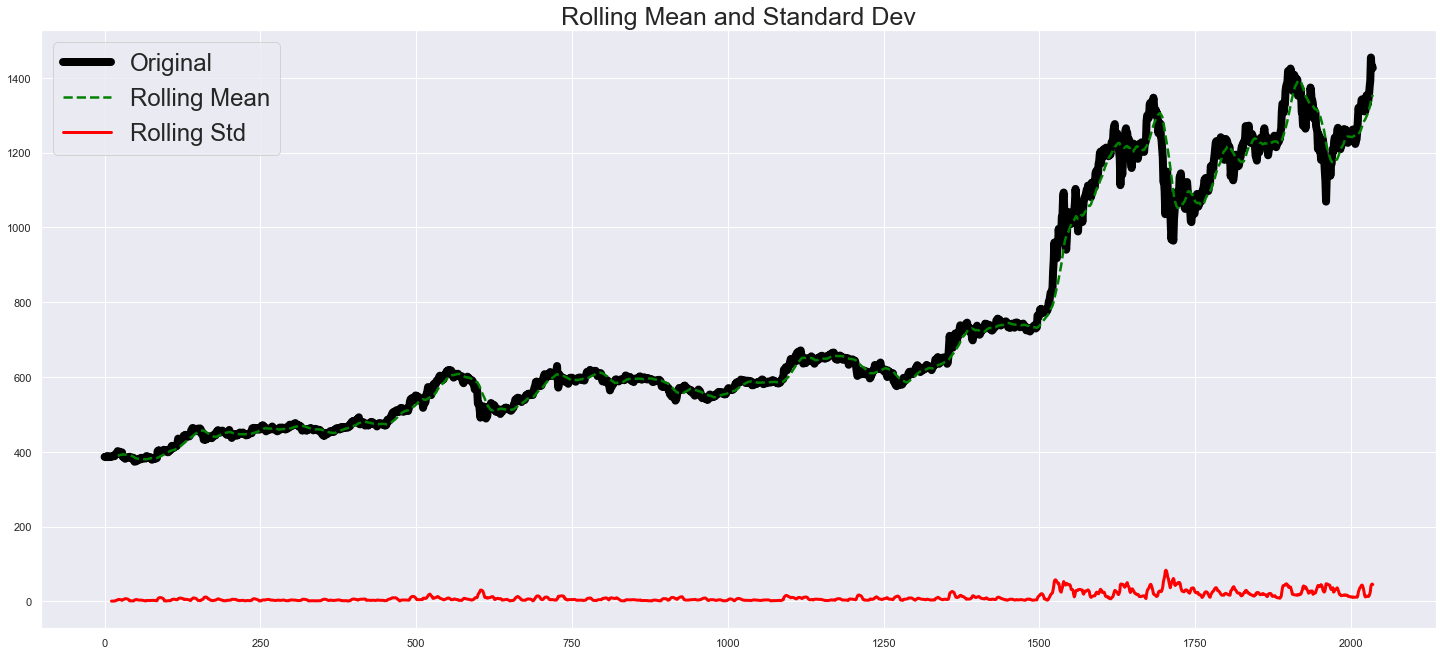

ADF Stastistic: 0.126502
p-val: 0.967825
The graph has a trend
Important values:
	1%: -3.47 
	5%: -2.88 
	10%: -2.58 


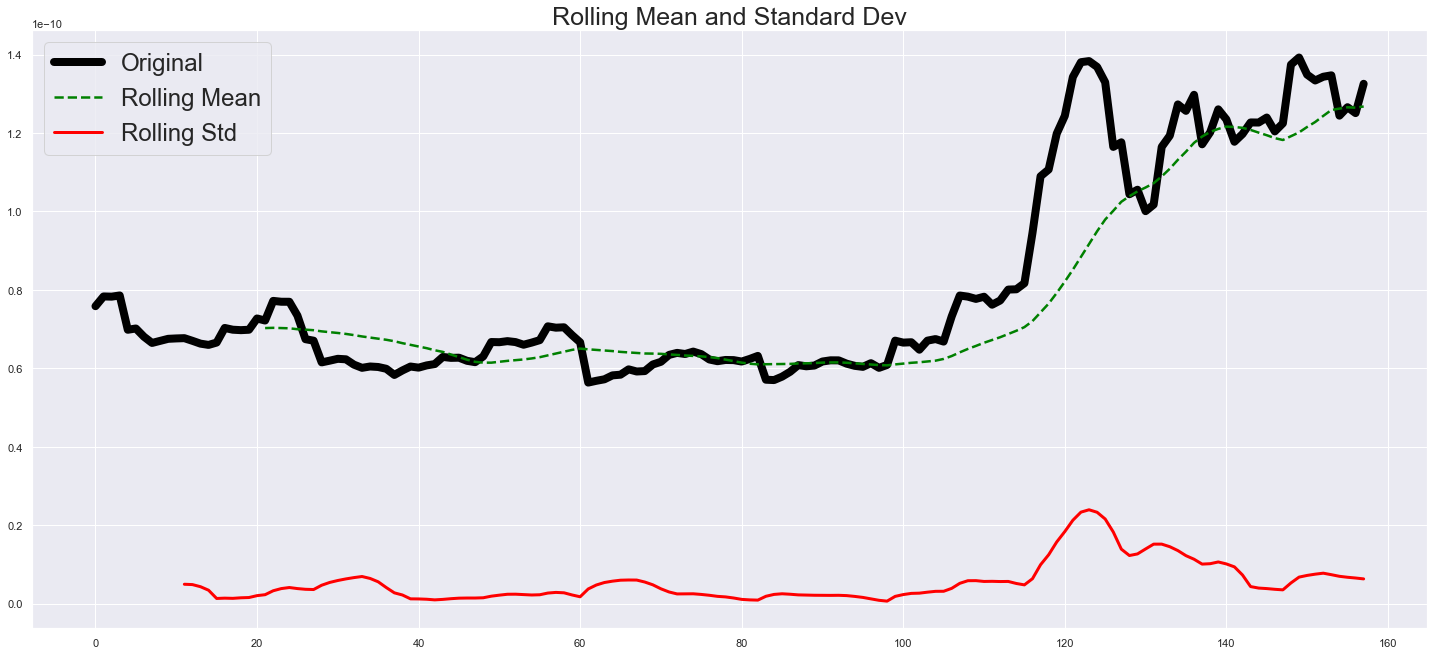

ADF Stastistic: -1.234881
p-val: 0.658414
The graph has a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


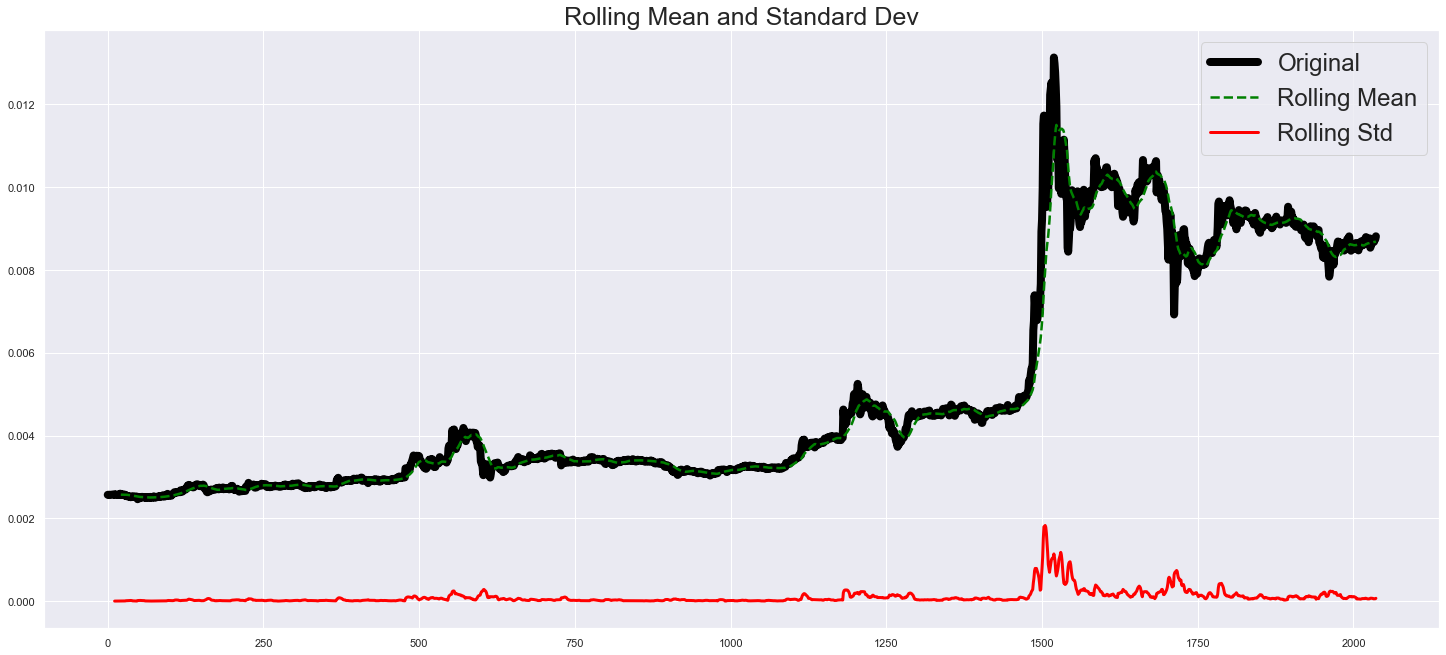

In [9]:
#Using function to test for trend in bitcoin price
test_trend(bt_data.prices, log="non stationary")

#Using function to test for trend in eth price
test_trend(eth_data.prices, log="non stationary")

#Using function to test for trend in doge price
test_trend(dg_data.prices, log="non stationary")

#Using function to test for trend in shiba-inu price
test_trend(shib_data.prices, log="non stationary")



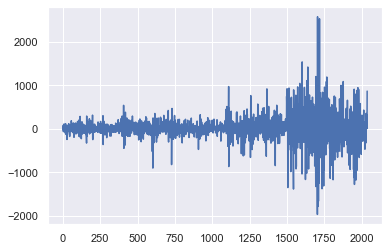

ADF Stastistic: -8.691675
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


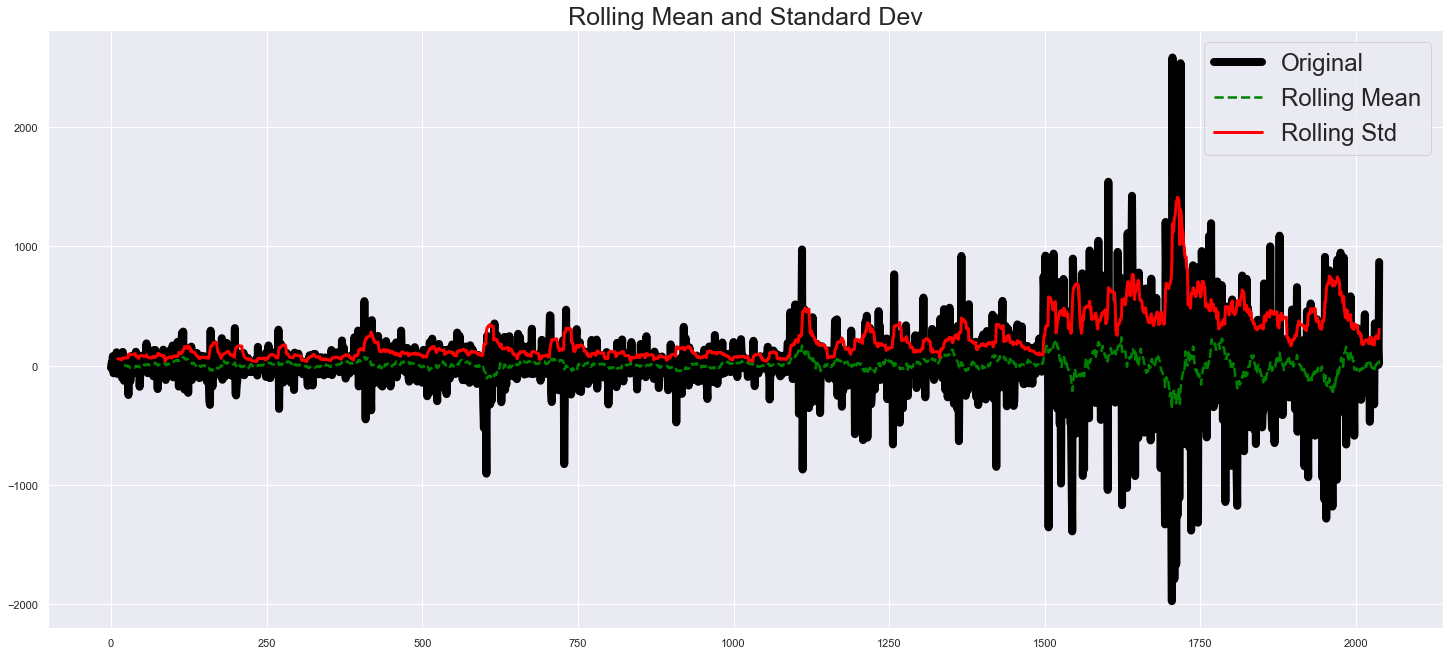

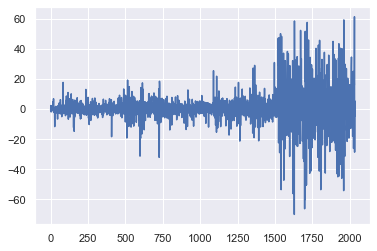

ADF Stastistic: -9.462192
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


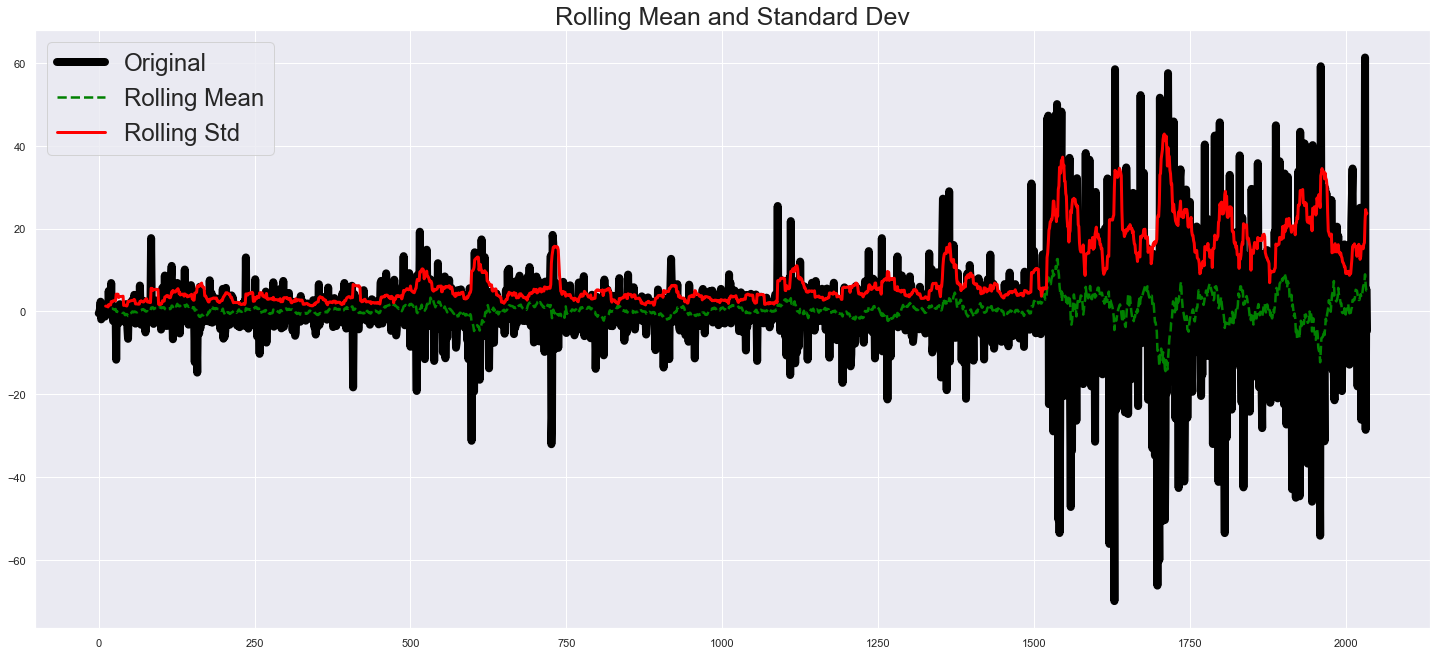

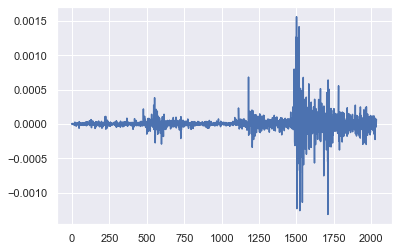

ADF Stastistic: -8.062011
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


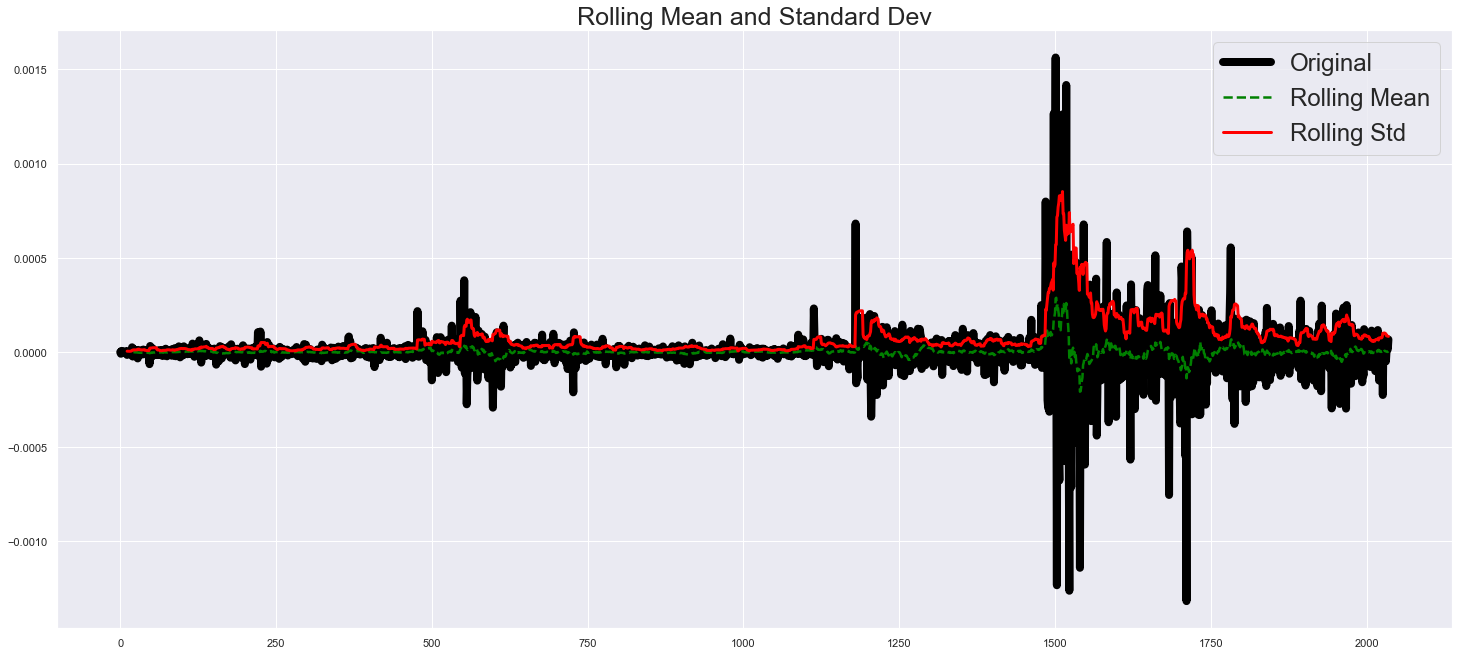

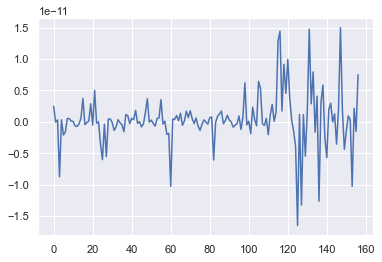

ADF Stastistic: -6.219938
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.47 
	5%: -2.88 
	10%: -2.58 


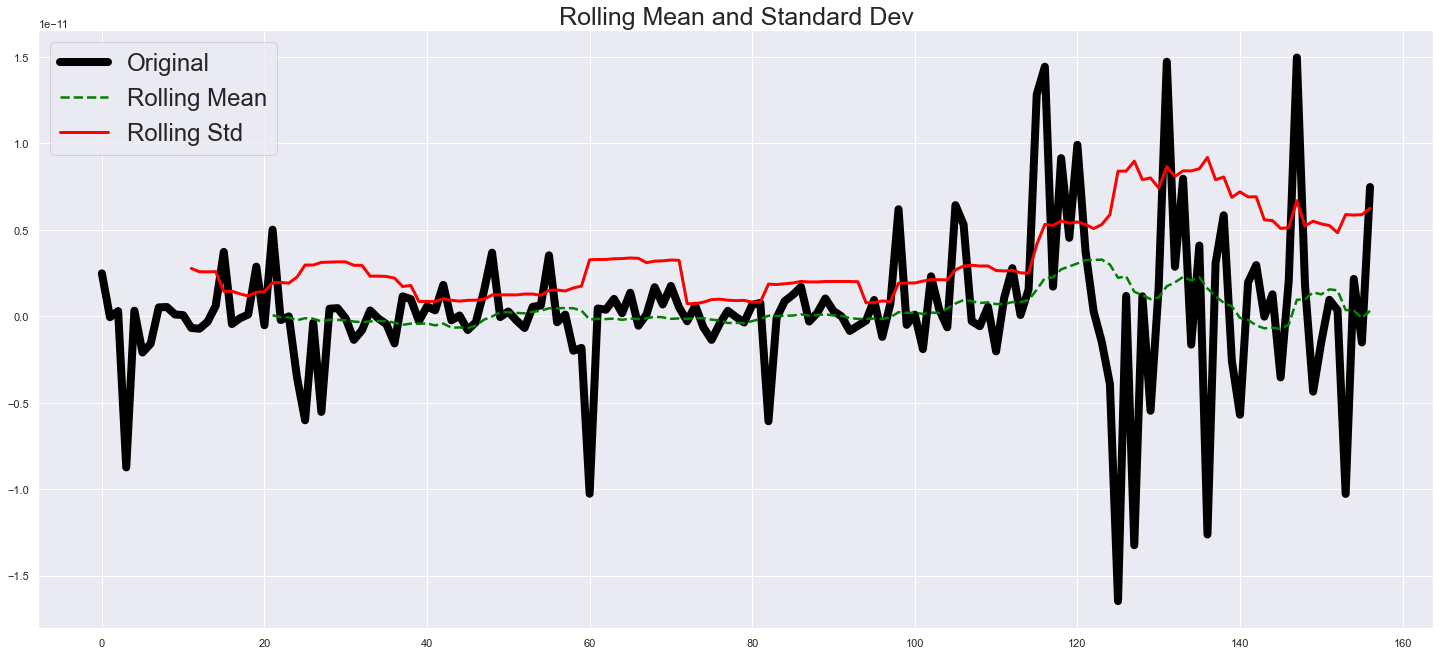

In [42]:
#To be able to use a model for price we will be needing to remove this trend
#by using differencing we will be removing trend
#Reference: https://machinelearningmastery.com/time-series-trends-in-python/
from pandas import datetime
from matplotlib import pyplot

bt_series = pd.read_csv('11_01_20_bit_hist_hr.csv')
X = bt_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

bt_adj_hr=pd.DataFrame(diff, columns=['price'])

test_trend(bt_adj_hr, log="stationary")

#Removing trend from Eth
eth_series = pd.read_csv('11_01_20_eth_hist_hr.csv')
X = eth_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

eth_adj_hr=pd.DataFrame(diff, columns=['price'])

test_trend(eth_adj_hr, log="stationary")

#removing trend from doge
doge_series = pd.read_csv('11_01_20_doge_hist_hr.csv')
X = doge_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

doge_adj_hr=pd.DataFrame(diff, columns=['price'])

test_trend(doge_adj_hr, log="stationary")

#removing trend from shib
shib_series = pd.read_csv('11_01_20_shib_hist_hr.csv')
X = shib_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

shib_adj_hr=pd.DataFrame(diff, columns=['price'])

test_trend(shib_adj_hr, log="stationary")

In [53]:
#Auto Regressive
ar_bt_arima_hr=ARIMA(bt_adj_hr['price'], order=(1,1,0)).fit(disp=0)
print(ar_bt_arima_hr.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2037
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -14924.390
Method:                       css-mle   S.D. of innovations            367.835
Date:                Wed, 15 Dec 2021   AIC                          29854.779
Time:                        15:09:46   BIC                          29871.637
Sample:                             1   HQIC                         29860.963
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2781      5.348      0.052      0.959     -10.203      10.759
ar.L1.D.price    -0.5243      0.019    -27.770      0.000      -0.561      -0.487
                                    Root

In [54]:
#Moving Average
ma_bt_arima_year=ARIMA(bt_adj_hr['price'], order=(0,1,1)).fit(disp=0)
print(ma_bt_arima_year.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2037
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14494.572
Method:                       css-mle   S.D. of innovations            297.337
Date:                Wed, 15 Dec 2021   AIC                          28995.143
Time:                        15:09:52   BIC                          29012.001
Sample:                             1   HQIC                         29001.327
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.723e-05      0.011     -0.006      0.995      -0.022       0.022
ma.L1.D.price    -0.9999      0.002   -643.221      0.000      -1.003      -0.997
                                    Root

In [57]:
# Fit model Ar(5) + I(2) + Ma(0)
bt_arima_hr=ARIMA(bt_adj_hr['price'], order=(5,2,0)).fit(disp=0)
print(bt_arima_hr.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                 2036
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -15063.249
Method:                       css-mle   S.D. of innovations            394.995
Date:                Wed, 15 Dec 2021   AIC                          30140.498
Time:                        15:10:52   BIC                          30179.829
Sample:                             2   HQIC                         30154.926
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0461      1.459      0.032      0.975      -2.814       2.906
ar.L1.D2.price    -1.4492      0.021    -67.894      0.000      -1.491      -1.407
ar.L2.D2.price    -1.4291      0.035

In [ ]:
#Auto Regressive
ar_eth_arima_hr=ARIMA(eth_adj_hr['price'], order=(1,1,0)).fit(disp=0)
print(ar_eth_arima_hr.summary())
#Moving Average
ma_eth_arima_hr=ARIMA(eth_adj_hr['price'], order=(0,1,1)).fit(disp=0)
print(ma_eth_arima_hr.summary())
# Fit model Ar(5) + I(1) + Ma(2)
eth_arima_hr=ARIMA(eth_adj_hr['price'], order=(2,1,1)).fit(disp=0)
print(eth_arima_hr.summary())

In [ ]:
#Auto Regressive
ar_doge_arima_hr=ARIMA(doge_adj_hr['price'], order=(1,1,0)).fit(disp=0)
print(ar_doge_arima_hr.summary())
#Moving Average
ma_doge_arima_hr=ARIMA(doge_adj_hr['price'], order=(0,1,1)).fit(disp=0)
print(ma_doge_arima_hr.summary())
# Fit model Ar(5) + I(1) + Ma(2)
doge_arima_hr=ARIMA(doge_adj_hr['price'], order=(5,1,1)).fit(disp=0)
print(doge_arima_hr.summary())

In [ ]:
#Auto Regressive
ar_shib_arima_hr=ARIMA(shib_adj_hr['price'], order=(1,1,0)).fit(disp=0)
print(ar_shib_arima_hr.summary())
#Moving Average
ma_shib_arima_hr=ARIMA(shib_adj_hr['price'], order=(0,1,1)).fit(disp=0)
print(ma_shib_arima_hr.summary())
# Fit model Ar(5) + I(1) + Ma(2)
shib_arima_hr=ARIMA(shib_adj_hr['price'], order=(5,1,0)).fit(disp=0)
print(shib_arima_hr.summary())

In [13]:
#Evaluating model for Bitcoin HR
# split into train and test sets
X = bt_adj_hr
size = int(len(X) * 0.66)
bt_train_price, bt_test_price = X[0:size], X[size:len(X)]
history = [x for x in bt_train_price]
predictions = list()

#creating list to store vals
pred_list, actual_list, error_list = [], [], []

#moving test and train values to list
bt_test_price=bt_test_price.values.tolist()
bt_train_price=bt_train_price.values.tolist()

#print(train_price)
#print(test_price)

In [51]:
#Arima test and pred for Bitcoin
for n in range(len(bt_test_price)):
    
    # Fit the arima model onto train data
    bt_arima_hr = ARIMA(bt_train_price, order=(3, 2, 0)).fit(disp=0)
    
    # Predict next value
    predicted_out = bt_arima_hr.forecast(1)[0]
    predicted_out = np.exp(predicted_out)
    pred_list.append(predicted_out)
    
    #Actual Value
    actual_out = bt_test_price[n]
    actual_list.append(actual_out)
    #print(actual_list)
      
    # Compute the error of model
    error = (abs(predicted_out - actual_out) / actual_out) * 100
    error_list.append(error)

In [31]:
bt_arima_hr.summary()

#test_price=np.array(test_price)
#type(test_price)
#print(test_price)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 1343
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -8932.660
Method:                       css-mle   S.D. of innovations            187.037
Date:                Wed, 15 Dec 2021   AIC                          17879.320
Time:                        13:18:18   BIC                          17915.739
Sample:                             2   HQIC                         17892.963
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0603      0.817     -0.074      0.941      -1.662       1.542
ar.L1.D2.y    -1.4586      0.026    -56.256      0.000      -1.509      -1.408
ar.L2.D2.y    -1.4818      0.043    -34.856      0.000      -1.565      -1.399
ar.L3.D2.y    -1.2224      0.048    -25.309      0.000      -1.317      -1.128
ar.L4.D2.y    -0.7783      0.043    -18.286      0.000      -0.862      -0.695
ar.L5.D2.y    -0.3120      0.026    -12.011      0.000      -0.363      -0.261
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2365           -1.1952j            1.2184           -0.2189
AR.2            0.2365           +1.1952j            1.2184            0.2189
AR.3           -1.2908           -0.0000j            1.2908           -0.5000
AR.4           -0.8385           -0.9847j            1.2934           -0.3623
AR.5           -0.8385           +0.9847j            1.2934            0.3623
-----------------------------------------------------------------------------
"""

In [39]:
#Bitcoin Price Predictions
predictions = bt_arima_hr.forecast(30)[0]
print(predictions)

[ -256.15782538  -294.10309969  -297.07656449  -484.23928974
  -569.05068095  -646.93274861  -674.24551907  -778.63338642
  -876.57794899  -969.22471667 -1026.82877015 -1107.43954757
 -1194.24198455 -1287.26717683 -1363.22138776 -1440.6895684
 -1522.0198662  -1609.94292681 -1692.39812995 -1772.86309009
 -1853.1735942  -1937.38353642 -2021.14339451 -2103.60224638
 -2184.97740622 -2267.80172595 -2351.21937513 -2434.47900124
 -2516.94496113 -2599.6648342 ]


In [43]:
#Evaluating model for ETH Hrly
# split into train and test sets
E = eth_adj_hr
size = int(len(E) * 0.66)
eth_train_price, eth_test_price = E[0:size], E[size:len(E)]

#creating list to store vals
eth_pred_list, eth_actual_list, eth_error_list = [], [], []

#moving test and train values to list
eth_test_price=eth_test_price.values.tolist()
eth_train_price=eth_train_price.values.tolist()

#print(train_price)
#print(test_price)

In [49]:
#Arima test and pred for ETH
for n in range(len(eth_test_price)):
    
    # Fit the arima model onto train data
    eth_arima_hr = ARIMA(eth_train_price, order=(3, 2, 2)).fit(disp=0)
    
    # Predict next value
    eth_predicted_out = eth_arima_hr.forecast(1)[0]
    eth_predicted_out = np.exp(eth_predicted_out)
    eth_pred_list.append(eth_predicted_out)
    
    #Actual Value
    eth_actual_out = eth_test_price[n]
    eth_actual_list.append(eth_actual_out)
    #print(actual_list)
      
    # Compute the error of model
    eth_error = (abs(eth_predicted_out - eth_actual_out) / eth_actual_out) * 100
    eth_error_list.append(eth_error)

In [58]:
#Reviewing ARIMA model for ETH
eth_arima_hr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1342
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -3997.662
Method:                       css-mle   S.D. of innovations              4.746
Date:                Wed, 15 Dec 2021   AIC                           8007.325
Time:                        15:11:25   BIC                           8038.536
Sample:                             1   HQIC                          8019.017
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.458      0.647      -0.001       0.000
ar.L1.D.y     -0.0117      0.027     -0.428      0.669      -0.065       0.042
ar.L2.D.y     -0.0500      0.027     -1.834      0.067      -0.103       0.003
ar.L3.D.y     -0.0151      0.027     -0.552      0.581      -0.069       0.038
ma.L1.D.y     -0.9999      0.002   -488.965      0.000      -1.004      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0552           -3.3332j            3.4962           -0.2012
AR.2            1.0552           +3.3332j            3.4962            0.2012
AR.3           -5.4255           -0.0000j            5.4255           -0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
#ETH Price Predictions
ETH_predictions = eth_arima_hr.forecast(30)[0]
print(ETH_predictions)

[-0.21779549 -0.03428357  0.09576073  0.10790753  0.09834476  0.09573515
  0.09590735  0.09602685  0.09590306  0.0957428   0.09559592  0.09545437
  0.09531265  0.09517046  0.0950282   0.09488597  0.09474375  0.09460153
  0.09445931  0.09431708  0.09417486  0.09403264  0.09389042  0.0937482
  0.09360597  0.09346375  0.09332153  0.09317931  0.09303709  0.09289487]


In [61]:
#Evaluating model for Doge Hrly
# split into train and test sets
D = doge_adj_hr
size = int(len(D) * 0.66)
doge_train_price, doge_test_price = D[0:size], D[size:len(D)]

#creating list to store vals
doge_pred_list, doge_actual_list, doge_error_list = [], [], []

#moving test and train values to list
doge_test_price=doge_test_price.values.tolist()
doge_train_price=doge_train_price.values.tolist()

#print(train_price)
#print(test_price)

In [65]:
#Arima test and pred for Doge
for n in range(len(doge_test_price)):
    
    # Fit the arima model onto train data
    doge_arima_hr = ARIMA(doge_train_price, order=(3, 2, 0)).fit(disp=0)
    
    # Predict next value
    doge_predicted_out = doge_arima_hr.forecast(1)[0]
    doge_predicted_out = np.exp(doge_predicted_out)
    doge_pred_list.append(doge_predicted_out)
    
    #Actual Value
    doge_actual_out = doge_test_price[n]
    doge_actual_list.append(doge_actual_out)
    #print(actual_list)
      
    # Compute the error of model
    doge_error = (abs(doge_predicted_out - doge_actual_out) / doge_actual_out) * 100
    doge_error_list.append(doge_error)

In [66]:
#Reviewing ARIMA model for Doge
doge_arima_hr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 1341
Model:                 ARIMA(3, 2, 0)   Log Likelihood               10851.076
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 15 Dec 2021   AIC                         -21692.153
Time:                        15:39:51   BIC                         -21666.147
Sample:                             2   HQIC                        -21682.410
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.072e-08      6e-07     -0.035      0.972    -1.2e-06    1.16e-06
ar.L1.D2.y    -1.1788      0.026    -46.014      0.000      -1.229      -1.129
ar.L2.D2.y    -0.8442      0.034    -24.782      0.000      -0.911      -0.777
ar.L3.D2.y    -0.3480      0.026    -13.588      0.000      -0.398      -0.298
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4552           -0.0000j            1.4552           -0.5000
AR.2           -0.4854           -1.3188j            1.4053           -0.3061
AR.3           -0.4854           +1.3188j            1.4053            0.3061
-----------------------------------------------------------------------------
"""

In [67]:
#Doge Price Predictions
doge_predictions = doge_arima_hr.forecast(30)[0]
print(doge_predictions)

[-1.70163615e-05 -4.57290323e-05 -7.85466569e-05 -8.56839179e-05
 -1.11636989e-04 -1.35731193e-04 -1.55138673e-04 -1.75162103e-04
 -1.99132703e-04 -2.19631289e-04 -2.40745892e-04 -2.62761686e-04
 -2.84473214e-04 -3.05638094e-04 -3.27460446e-04 -3.49144994e-04
 -3.70697018e-04 -3.92362641e-04 -4.14124032e-04 -4.35792596e-04
 -4.57520047e-04 -4.79292966e-04 -5.01064724e-04 -5.22848819e-04
 -5.44673373e-04 -5.66510069e-04 -5.88363848e-04 -6.10243004e-04
 -6.32143444e-04 -6.54061272e-04]


In [68]:
#Evaluating model for Doge Hrly
# split into train and test sets
S = shib_adj_hr
size = int(len(S) * 0.66)
shib_train_price, shib_test_price = S[0:size], S[size:len(S)]

#creating list to store vals
shib_pred_list, shib_actual_list, shib_error_list = [], [], []

#moving test and train values to list
shib_test_price=shib_test_price.values.tolist()
shib_train_price=shib_train_price.values.tolist()

#print(train_price)
#print(test_price)

In [70]:
#Arima test and pred for Shib
for n in range(len(shib_test_price)):
    
    # Fit the arima model onto train data
    shib_arima_hr = ARIMA(shib_train_price, order=(5, 2, 0)).fit(disp=0)
    
    # Predict next value
    shib_predicted_out = shib_arima_hr.forecast(1)[0]
    shib_predicted_out = np.exp(shib_predicted_out)
    shib_pred_list.append(shib_predicted_out)
    
    #Actual Value
    shib_actual_out = shib_test_price[n]
    shib_actual_list.append(shib_actual_out)
    #print(actual_list)
      
    # Compute the error of model
    shib_error = (abs(shib_predicted_out - shib_actual_out) / shib_actual_out) * 100
    shib_error_list.append(shib_error)

/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/

In [71]:
#Reviewing ARIMA model for Shib
shib_arima_hr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  101
Model:                 ARIMA(5, 2, 0)   Log Likelihood                2539.909
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 15 Dec 2021   AIC                          -5065.817
Time:                        15:41:03   BIC                          -5047.511
Sample:                             2   HQIC                         -5058.406
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.682e-14    6.8e-08   9.83e-07      1.000   -1.33e-07    1.33e-07
ar.L1.D2.y    -1.2787      0.099    -12.894      0.000      -1.473      -1.084
ar.L2.D2.y    -1.0177      0.161     -6.314      0.000      -1.334      -0.702
ar.L3.D2.y    -0.7160      0.186     -3.856      0.000      -1.080      -0.352
ar.L4.D2.y    -0.4412      0.173     -2.546      0.011      -0.781      -0.102
ar.L5.D2.y    -0.1846      0.111     -1.663      0.096      -0.402       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4106           -1.3656j            1.4260           -0.2035
AR.2            0.4106           +1.3656j            1.4260            0.2035
AR.3           -0.9288           -1.0511j            1.4027           -0.3652
AR.4           -0.9288           +1.0511j            1.4027            0.3652
AR.5           -1.3542           -0.0000j            1.3542           -0.5000
-----------------------------------------------------------------------------
"""

In [72]:
#ShibPrice Predictions
shib_predictions = shib_arima_hr.forecast(30)[0]
print(shib_predictions)

[1.02369766e-12 1.64245612e-12 1.08345643e-12 2.07632182e-12
 2.50937509e-12 3.40625811e-12 3.64628351e-12 4.49757773e-12
 5.17412939e-12 6.13092718e-12 6.98371557e-12 7.97086331e-12
 8.96561549e-12 1.01069030e-11 1.12609766e-11 1.25139734e-11
 1.38043267e-11 1.51809545e-11 1.66156622e-11 1.81254786e-11
 1.96935655e-11 2.13340895e-11 2.30372910e-11 2.48109784e-11
 2.66492431e-11 2.85555385e-11 3.05275628e-11 3.25673312e-11
 3.46733027e-11 3.68466117e-11]
